<a href="https://colab.research.google.com/github/alamwasim/Jobathon-May21/blob/main/Jobathon_May21_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pycaret

In [1]:
pip install catboost

     |████████████████████████████████| 67.3MB 58kB/s 


In [2]:

from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import pandas_profiling 
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
# from pycaret.classification import *
# import category_encoders as ce
from sklearn.model_selection import train_test_split

# Importing Data from locally uploaded csv file

In [4]:
train=pd.read_csv('/content/job-a-thon-train.csv')
test=pd.read_csv('/content/job-a-thon-test.csv')
train.shape,test.shape

((245725, 11), (105312, 10))

In [5]:
train.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,6GY8ESI7,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [6]:
test.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
count,105312,105312,105312.000000,105312,105312,105312,105312.000000,92790,1.053120e+05,105312
unique,105312,2,NaN,35,4,4,NaN,2,NaN,2
top,4QJO2VOT,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No
freq,1,57705,NaN,15125,43192,44484,NaN,61608,NaN,63797
mean,NaN,NaN,43.871002,NaN,NaN,NaN,46.842819,NaN,1.134195e+06,NaN
std,NaN,NaN,14.872890,NaN,NaN,NaN,32.273634,NaN,8.662430e+05,NaN
min,NaN,NaN,24.000000,NaN,NaN,NaN,7.000000,NaN,2.259700e+04,NaN
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.039822e+05,NaN
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.966345e+05,NaN
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.371598e+06,NaN


In [7]:
train.Credit_Product.value_counts(dropna=False,normalize=True)

No     0.587474
Yes    0.293185
NaN    0.119341
Name: Credit_Product, dtype: float64

In [8]:
test.Credit_Product.value_counts(dropna=False,normalize=True)

No     0.585005
Yes    0.296092
NaN    0.118904
Name: Credit_Product, dtype: float64

# Appending test and train data together

In [38]:
df=train.append(test,ignore_index=True)

# Imputing Credit Product

In [ ]:
from catboost import CatBoostClassifier,Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,mean_squared_error

X,y=train[~train.Credit_Product.isna()].drop(['ID','Is_Lead','Credit_Product'],axis=1),train[~train.Credit_Product.isna()]['Credit_Product']

for col in X.select_dtypes('object').columns:
  X[col]=X[col].astype('category')
print(X.dtypes)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 123,stratify=y)

categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices

cat_model=CatBoostClassifier(n_estimators=3000,random_state=123,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=20)
cat_model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
pred=cat_model.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,pred))

Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Avg_Account_Balance       int64
Is_Active              category
dtype: object
0:	test: 0.5354357	test1: 0.5368236	best: 0.5368236 (0)	total: 135ms	remaining: 6m 45s
200:	test: 0.7427308	test1: 0.7384201	best: 0.7384201 (200)	total: 29.3s	remaining: 6m 48s
400:	test: 0.7619808	test1: 0.7567038	best: 0.7567038 (400)	total: 59.3s	remaining: 6m 24s
600:	test: 0.7687582	test1: 0.7605874	best: 0.7605874 (600)	total: 1m 30s	remaining: 6m
800:	test: 0.7721841	test1: 0.7612976	best: 0.7613081 (795)	total: 2m 1s	remaining: 5m 34s
1000:	test: 0.7747194	test1: 0.7615718	best: 0.7615718 (1000)	total: 2m 32s	remaining: 5m 4s
1200:	test: 0.7768719	test1: 0.7617133	best: 0.7617133 (1200)	total: 3m 3s	remaining: 4m 35s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7617244873
bestIteration = 

In [ ]:
%%time
auc=[]
y_pred_tot=[]
model=[]

X,y=train[~train.Credit_Product.isna()].drop(['ID','Is_Lead','Credit_Product'],axis=1),train[~train.Credit_Product.isna()]['Credit_Product']
Xtest=df[df.Credit_Product.isna()][X.columns]
for col in X.select_dtypes('object').columns:
  X[col]=X[col].astype('category')
print(X.dtypes)
categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices

from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    m=CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=20)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
    model.append(m)
    
    preds=m.predict_proba(X_test,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    auc.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest,ntree_end=m.best_iteration_)[:,-1]
    y_pred_tot.append(p)

Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Avg_Account_Balance       int64
Is_Active              category
dtype: object
0:	test: 0.7056377	test1: 0.7086481	best: 0.7086481 (0)	total: 219ms	remaining: 10m 55s
200:	test: 0.7404058	test1: 0.7434070	best: 0.7434070 (200)	total: 31.9s	remaining: 7m 23s
400:	test: 0.7608209	test1: 0.7618558	best: 0.7618558 (400)	total: 1m 5s	remaining: 7m 4s
600:	test: 0.7669592	test1: 0.7654527	best: 0.7654618 (599)	total: 1m 41s	remaining: 6m 44s
800:	test: 0.7700907	test1: 0.7664458	best: 0.7664621 (793)	total: 2m 16s	remaining: 6m 16s
1000:	test: 0.7725295	test1: 0.7668951	best: 0.7668964 (998)	total: 2m 52s	remaining: 5m 45s
1200:	test: 0.7744959	test1: 0.7669696	best: 0.7669753 (1158)	total: 3m 29s	remaining: 5m 13s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7669783691
bestIterat

In [ ]:
pred=[]
for x in np.mean(y_pred_tot,0):
  if x>=0.5:pred.append('Yes')
  else: pred.append('No')

In [ ]:
df['Credit_Product_Imputed']=df['Credit_Product']
df.loc[df.Credit_Product.isna(),'Credit_Product_Imputed']=pred

In [ ]:
df.loc[df.Credit_Product.isna()].head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Credit_Product_Imputed,Credit_Product_Missing,F1,F2,F3,F4,F5,F6,Is_Active_bool,Credit_Product_bool,A_Avg_Account_Balance_sum,A_Avg_Account_Balance_max,A_Avg_Account_Balance_min,A_Avg_Account_Balance_mean,A_Vintage_max,A_Vintage_min,A_Vintage_mean,A_Age_max,A_Age_min,A_Channel_Code_nunique,A_Region_Code_nunique,A_Credit_Product_bool_mean,B_Avg_Account_Balance_sum,B_Avg_Account_Balance_max,B_Avg_Account_Balance_min,B_Avg_Account_Balance_mean,B_Vintage_sum,B_Vintage_max,B_Vintage_min,B_Vintage_mean,B_Age_mean,B_Age_min,B_Region_Code_nunique,B_Credit_Product_bool_sum,B_Credit_Product_bool_mean,B_Is_Active_bool_mean,C_Avg_Account_Balance_sum,C_Avg_Account_Balance_min,C_Vintage_min,C_Age_min,C_Channel_Code_nunique,C_Region_Code_nunique,D_Avg_Account_Balance_sum,D_Avg_Account_Balance_max,D_Avg_Account_Balance_min,D_Vintage_sum,D_Vintage_max,D_Vintage_min,D_Age_min,E_Avg_Account_Balance_sum,E_Avg_Account_Balance_max,E_Avg_Account_Balance_min,E_Vintage_sum,E_Vintage_max,E_Vintage_min,E_Age_max,E_Age_min,E_Occupation_nunique,E_Region_Code_nunique,E_Credit_Product_bool_sum
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1.0,No,Yes,RG282|Other,RG282|X3,Other|X3,Male|Other,Male|X3,nan|Yes,1,0,121471695070,10352009,20790,1.211035e+06,135,7,54.805780,85,24,4,35,0.306698,49190672720,10352009,66812,1.347985e+06,2902044,135,7,79.525485,63.927683,24,35,13291,0.364217,0.509262,70047034965,20790,7,24,4,35,30611092833,10352009,66812,1865927,135,7,24,75549691401,10352009,44856,4602451,135,7,85,24,4,35,22435
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,NaN,517063,Yes,1.0,No,Yes,RG268|Self_Employed,RG268|X2,Self_Employed|X2,Male|Self_Employed,Male|X2,nan|Yes,1,0,163248249301,8762071,22597,1.133055e+06,135,7,55.559676,61,23,4,35,0.333937,68893052950,8762071,47526,1.103596e+06,3326700,117,7,53.290296,47.175776,23,35,20587,0.329782,0.533512,96856093011,22597,7,24,4,35,43930161329,8762071,57672,2187199,117,7,24,70545676252,9878021,20790,3473378,117,7,85,24,4,35,21685
31,ABPMK4WU,Female,32,RG279,Salaried,X4,15,NaN,1072850,Yes,1.0,No,Yes,RG279|Salaried,RG279|X4,Salaried|X4,Female|Salaried,Female|X4,nan|Yes,1,0,106663873782,9701151,45950,1.036457e+06,134,7,26.311217,65,24,4,35,0.214241,910221932,7422057,118548,1.059630e+06,10690,15,7,12.444703,34.087311,24,34,461,0.536671,0.378347,56543232971,48389,7,24,4,35,389163851,7422057,129228,4330,15,7,24,3047804460,7939847,118743,38028,15,7,85,24,4,35,1446
36,MTEIXMB9,Female,41,RG268,Self_Employed,X3,62,NaN,962383,No,1.0,No,Yes,RG268|Self_Employed,RG268|X3,Self_Employed|X3,Female|Self_Employed,Female|X3,nan|No,0,0,163248249301,8762071,22597,1.133055e+06,135,7,55.559676,61,23,4,35,0.333937,64625208152,8680305,44856,1.223406e+06,3881268,135,7,73.475466,50.086514,24,35,19533,0.369775,0.530498,66392156290,47526,7,23,4,35,26415728325,8643247,66812,1493682,135,7,24,49650123374,9908858,66812,2730300,135,7,85,24,4,35,14323
40,6WX9JDVK,Female,63,RG254,Other,X3,103,NaN,1249319,Yes,1.0,No,Yes,RG254|Other,RG254|X3,Other|X3,Female|Other,Female|X3,nan|Yes,1,0,121471695070,10352009,20790,1.211035e+06,135,7,54.805780,85,24,4,35,0.306698,49190672720,10352009,66812,1.347985e+06,2902044,135,7,79.525485,63.927683,24,35,13291,0.364217,0.509262,51424660105,45657,7,24,4,35,18579579887,9908858,80456,1036117,135,7,24,49650123374,9908858,66812,2730300,135,7,85,24,4,35,14323


In [ ]:
df.to_csv('df_imputed.csv',index=False)

# Feature Engineering 

## Indicator for missing values

In [39]:
df['Credit_Product_Missing']=df['Credit_Product'].apply(lambda x : 'Yes' if pd.isna(x) else 'No')

## Making continuous variable as categories

In [40]:
df['Age_Category']=df['Age'].astype('category')
df['Vintage_Category']=df['Vintage'].astype('category')

## Combine different categorical columns together

In [41]:
df['F1'] = (df['Region_Code'].astype(str)+'|'+df['Occupation'].astype(str))
df['F2'] = (df['Region_Code'].astype(str)+'|'+df['Channel_Code'].astype(str))
df['F3'] = (df['Occupation'].astype(str)+'|'+df['Channel_Code'].astype(str))
df['F4'] = (df['Gender'].astype(str)+'|'+df['Occupation'].astype(str))
df['F5'] = (df['Gender'].astype(str)+'|'+df['Channel_Code'].astype(str))
# df['F6'] = (df['Credit_Product'].astype(str)+'|'+df['Is_Active'].astype(str))
# df['F7'] = (df['Occupation'].astype(str)+'|'+df['Channel_Code'].astype(str) + '|'+ df['Credit_Product'].astype(str))

In [42]:
df.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Credit_Product_Missing,Age_Category,Vintage_Category,F1,F2,F3,F4,F5
351032,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,NaN,No,52,86,RG268|Salaried,RG268|X2,Salaried|X2,Male|Salaried,Male|X2
351033,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,NaN,No,55,86,RG277|Other,RG277|X2,Other|X2,Male|Other,Male|X2
351034,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,NaN,No,35,15,RG254|Salaried,RG254|X4,Salaried|X4,Male|Salaried,Male|X4
351035,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes,NaN,No,53,93,RG254|Other,RG254|X3,Other|X3,Male|Other,Male|X3
351036,F2NOYPPZ,Male,27,RG256,Salaried,X1,21,No,591565,No,NaN,No,27,21,RG256|Salaried,RG256|X1,Salaried|X1,Male|Salaried,Male|X1


## Aggregate columns to get new features

In [43]:
print(df['Is_Active'].value_counts(dropna=False),'\n')
df['Is_Active_bool']=df['Is_Active'].apply(lambda x : 1 if x=='Yes' else 0)

print(df['Credit_Product'].value_counts(dropna=False))
df['Credit_Product_bool']=df['Credit_Product'].apply(lambda x : 1 if x=='Yes' else 0)

No     214087
Yes    136950
Name: Is_Active, dtype: int64 

No     205965
Yes    103225
NaN     41847
Name: Credit_Product, dtype: int64


In [44]:
agg_data={
    'Avg_Account_Balance':['sum','max','min','mean'],
    'Vintage':['sum','max','min','mean'],
    'Age':['mean','max','min'],
    'Channel_Code':['size','nunique'],
    'Region_Code':['size','nunique'],
    'Credit_Product_bool':['sum','mean'],
    'Is_Active_bool' : ['sum','mean'] 
}

df1 = df.groupby(['Occupation']).agg(agg_data)

df1.columns=['A_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on='Occupation',how='left')

In [45]:
agg_data={
    'Avg_Account_Balance':['sum','max','min','mean'],
    'Vintage':['sum','max','min','mean'],
    'Age':['mean','max','min'],
    'Region_Code':['size','nunique'],
    'Credit_Product_bool':['sum','mean'],
    'Is_Active_bool' : ['sum','mean'] 
}

df1 = df.groupby(['Channel_Code','Occupation']).agg(agg_data)

df1.columns=['B_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['Channel_Code','Occupation'],how='left')

In [46]:
agg_data={
    'Avg_Account_Balance':['sum','max','min','mean'],
    'Vintage':['sum','max','min','mean'],
    'Age':['mean','max','min'],
    'Channel_Code':['size','nunique'],
    'Region_Code':['size','nunique'],
    'Credit_Product_bool':['sum','mean'],
    'Is_Active_bool' : ['sum','mean'] 
}

df1 = df.groupby(['Gender','Occupation']).agg(agg_data)

df1.columns=['C_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['Gender','Occupation'],how='left')

In [47]:
agg_data={
    'Avg_Account_Balance':['sum','max','min','mean'],
    'Vintage':['sum','max','min','mean'],
    'Age':['mean','max','min'],
    'Region_Code':['size','nunique'],
    'Credit_Product_bool':['sum','mean'],
    'Is_Active_bool' : ['sum','mean'] 
}

df1 = df.groupby(['Gender','Occupation','Channel_Code']).agg(agg_data)

df1.columns=['D_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['Gender','Occupation','Channel_Code'],how='left')

In [48]:
agg_data={
    'Avg_Account_Balance':['sum','max','min','mean'],
    'Vintage':['sum','max','min','mean'],
    'Age':['mean','max','min'],
    'Occupation':['size','nunique'],
    'Region_Code':['size','nunique'],
    'Credit_Product_bool':['sum','mean'],
    'Is_Active_bool' : ['sum','mean'] 
}

df1 = df.groupby(['Gender','Channel_Code']).agg(agg_data)

df1.columns=['E_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['Gender','Channel_Code'],how='left')

In [49]:
print(df.shape)
df.head()

(351037, 112)


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Credit_Product_Missing,Age_Category,Vintage_Category,F1,F2,F3,F4,F5,Is_Active_bool,Credit_Product_bool,A_Avg_Account_Balance_sum,A_Avg_Account_Balance_max,A_Avg_Account_Balance_min,A_Avg_Account_Balance_mean,A_Vintage_sum,A_Vintage_max,A_Vintage_min,A_Vintage_mean,A_Age_mean,A_Age_max,A_Age_min,A_Channel_Code_size,A_Channel_Code_nunique,A_Region_Code_size,A_Region_Code_nunique,A_Credit_Product_bool_sum,A_Credit_Product_bool_mean,A_Is_Active_bool_sum,A_Is_Active_bool_mean,...,C_Credit_Product_bool_sum,C_Credit_Product_bool_mean,C_Is_Active_bool_sum,C_Is_Active_bool_mean,D_Avg_Account_Balance_sum,D_Avg_Account_Balance_max,D_Avg_Account_Balance_min,D_Avg_Account_Balance_mean,D_Vintage_sum,D_Vintage_max,D_Vintage_min,D_Vintage_mean,D_Age_mean,D_Age_max,D_Age_min,D_Region_Code_size,D_Region_Code_nunique,D_Credit_Product_bool_sum,D_Credit_Product_bool_mean,D_Is_Active_bool_sum,D_Is_Active_bool_mean,E_Avg_Account_Balance_sum,E_Avg_Account_Balance_max,E_Avg_Account_Balance_min,E_Avg_Account_Balance_mean,E_Vintage_sum,E_Vintage_max,E_Vintage_min,E_Vintage_mean,E_Age_mean,E_Age_max,E_Age_min,E_Occupation_size,E_Occupation_nunique,E_Region_Code_size,E_Region_Code_nunique,E_Credit_Product_bool_sum,E_Credit_Product_bool_mean,E_Is_Active_bool_sum,E_Is_Active_bool_mean
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,No,73,43,RG268|Other,RG268|X3,Other|X3,Female|Other,Female|X3,0,0,121471695070,10352009,20790,1.211035e+06,5497239,135,7,54.805780,53.152157,85,24,100304,4,100304,35,30763,0.306698,41329,0.412037,...,12300,0.283371,16613,0.382735,18579579887,9908858,80456,1.367855e+06,1036117,135,7,76.280424,63.315541,85,24,13583,35,4900,0.360745,6851,0.504380,49650123374,9908858,66812,1.303392e+06,2730300,135,7,71.674586,53.644055,85,24,38093,4,38093,35,14323,0.376001,18958,0.497677
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,No,30,32,RG277|Salaried,RG277|X1,Salaried|X1,Female|Salaried,Female|X1,0,0,106663873782,9701151,45950,1.036457e+06,2707740,134,7,26.311217,30.868801,65,24,102912,4,102912,35,22048,0.214241,23904,0.232276,...,11248,0.199510,12609,0.223651,50215077413,9701151,48389,9.808973e+05,1167036,129,7,22.796789,29.236614,64,24,51193,35,8879,0.173442,10658,0.208193,83520815541,9701151,45657,1.005536e+06,2057268,129,7,24.768158,31.973947,85,24,83061,4,83061,35,15694,0.188945,18243,0.219634
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,No,56,26,RG268|Self_Employed,RG268|X3,Self_Employed|X3,Female|Self_Employed,Female|X3,1,0,163248249301,8762071,22597,1.133055e+06,8004927,135,7,55.559676,46.568116,61,23,144078,4,144078,35,48113,0.333937,70063,0.486285,...,18934,0.326437,26699,0.460312,26415728325,8643247,66812,1.263910e+06,1493682,135,7,71.468038,49.474689,61,24,20900,35,7814,0.373876,10796,0.516555,49650123374,9908858,66812,1.303392e+06,2730300,135,7,71.674586,53.644055,85,24,38093,4,38093,35,14323,0.376001,18958,0.497677
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,No,34,19,RG270|Salaried,RG270|X1,Salaried|X1,Male|Salaried,Male|X1,0,0,106663873782,9701151,45950,1.036457e+06,2707740,134,7,26.311217,30.868801,65,24,102912,4,102912,35,22048,0.214241,23904,0.232276,...,10800,0.232088,11295,0.242726,40658741365,9614883,45950,1.044755e+06,894253,99,7,22.978467,29.481589,64,24,38917,35,7343,0.188684,8028,0.206285,69634810992,10007678,22597,1.068986e+06,1693999,99,7,26.005112,32.803733,85,24,65141,4,65141,35,13558,0.208133,14803,0.227246
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,No,30,33,RG282|Salaried,RG282|X1,Salaried|X1,Female|Salaried,Female|X1,0,0,106663873782,9701151,45950,1.036457e+06,2707740,134,7,26.311217,30.868801,65,24,102912,4,102912,35,22048,0.214241,23904,0.232276,...,11248,0.199510,12609,0.223651,50215077413,9701151,48389,9.808973e+05,1167036,129,7,22.796789,29.236614,64,24,51193,35,8879,0.173442,10658,0.208193,83520815541,9701151,45657,1.005536e+0

## Removing high correlated columns

In [50]:
%%time
to_drop=[]
corr_matrix = df.drop(['ID','Is_Lead'],axis=1).corr()
# print(corr_matrix)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# print(upper)

to_drop = [column for column in upper.columns if any(upper[column] > 0.93)]
print(to_drop)
print(f"No. of Columns to be Dropped:{len(to_drop)}")

['A_Vintage_sum', 'A_Age_mean', 'A_Channel_Code_size', 'A_Region_Code_size', 'A_Credit_Product_bool_sum', 'A_Is_Active_bool_sum', 'A_Is_Active_bool_mean', 'B_Age_max', 'B_Region_Code_size', 'B_Is_Active_bool_sum', 'C_Avg_Account_Balance_max', 'C_Avg_Account_Balance_mean', 'C_Vintage_sum', 'C_Vintage_max', 'C_Vintage_mean', 'C_Age_mean', 'C_Age_max', 'C_Channel_Code_size', 'C_Region_Code_size', 'C_Credit_Product_bool_sum', 'C_Credit_Product_bool_mean', 'C_Is_Active_bool_sum', 'C_Is_Active_bool_mean', 'D_Avg_Account_Balance_mean', 'D_Vintage_mean', 'D_Age_mean', 'D_Age_max', 'D_Region_Code_size', 'D_Region_Code_nunique', 'D_Credit_Product_bool_sum', 'D_Credit_Product_bool_mean', 'D_Is_Active_bool_sum', 'D_Is_Active_bool_mean', 'E_Avg_Account_Balance_mean', 'E_Vintage_mean', 'E_Age_mean', 'E_Occupation_size', 'E_Region_Code_size', 'E_Credit_Product_bool_mean', 'E_Is_Active_bool_sum', 'E_Is_Active_bool_mean']
No. of Columns to be Dropped:41
CPU times: user 6.97 s, sys: 188 ms, total: 7.16 

In [51]:
print(f"Columns Dropped:{len(to_drop)}")
df.drop(to_drop,inplace=True,axis=1)
df.shape

Columns Dropped:41


(351037, 71)

## Catboost on only Imputed columns

In [ ]:
df_train=df[~df.Is_Lead.isna()]
df_test=df[df.Is_Lead.isna()]

In [ ]:
train_columns=['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product_Imputed', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead']

In [ ]:
from catboost import CatBoostClassifier,Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,mean_squared_error

X,y=df_train[train_columns].drop(['ID','Is_Lead'],axis=1),df_train['Is_Lead']

for col in X.select_dtypes('object').columns:
  X[col]=X[col].astype('category')
print(X.dtypes)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 123,stratify=y)

categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices

cat_model=CatBoostClassifier(n_estimators=3000,random_state=123,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=20)
cat_model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
pred=cat_model.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,pred))


Gender                    category
Age                          int64
Region_Code               category
Occupation                category
Channel_Code              category
Vintage                      int64
Credit_Product_Imputed    category
Avg_Account_Balance          int64
Is_Active                 category
dtype: object
0:	test: 0.6966057	test1: 0.6929687	best: 0.6929687 (0)	total: 232ms	remaining: 11m 34s
200:	test: 0.7869457	test1: 0.7856014	best: 0.7856014 (200)	total: 33.1s	remaining: 7m 40s
400:	test: 0.8005530	test1: 0.7989856	best: 0.7989856 (400)	total: 1m 7s	remaining: 7m 14s
600:	test: 0.8054180	test1: 0.8010325	best: 0.8010325 (600)	total: 1m 43s	remaining: 6m 52s
800:	test: 0.8081284	test1: 0.8013799	best: 0.8013895 (793)	total: 2m 19s	remaining: 6m 21s
1000:	test: 0.8102305	test1: 0.8013533	best: 0.8014135 (904)	total: 2m 54s	remaining: 5m 48s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8014134863
bestIteration = 904

Shrink model to first 9

In [ ]:
x_test=df_test[train_columns].drop(['ID','Is_Lead'],axis=1)

for col in x_test.select_dtypes('object').columns:
  X[col]=X[col].astype('category')
Xpred_catboost=cat_model.predict_proba(x_test)[:,-1]
test['Is_Lead']=Xpred_catboost

In [ ]:
submission=test[['ID','Is_Lead']]
submission.to_csv('catboost-imputed-v1.csv',index=False)

# Getting Feature Importance

In [72]:
df_train=df[~df.Is_Lead.isna()]
df_test=df[df.Is_Lead.isna()]
df_train.shape,train.shape,':',df_test.shape,test.shape

((245725, 71), (245725, 11), ':', (105312, 71), (105312, 11))

## Catboost feature Importance

In [53]:
from catboost import CatBoostClassifier,Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,mean_squared_error

X,y=df_train.drop(['ID','Is_Lead'],axis=1),df_train['Is_Lead']
X.loc[X.Credit_Product.isna(),'Credit_Product']='nan'

for col in X.select_dtypes('object').columns:
  X[col]=X[col].astype('category')
# print(X.dtypes)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 123,stratify=y)

categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices

cat_model=CatBoostClassifier(n_estimators=3000,random_state=123,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=20)
cat_model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
pred=cat_model.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,pred))

# 0.8737583677980174
# 0.8735053202201757  - feat eng v3

# 0.87370
# 0.8737073949490536

# 0.8739884049930473  -> Making Age and Vintage as category

0:	test: 0.6389683	test1: 0.6409453	best: 0.6409453 (0)	total: 348ms	remaining: 17m 22s
200:	test: 0.8668118	test1: 0.8640804	best: 0.8640804 (200)	total: 1m 5s	remaining: 15m 15s
400:	test: 0.8763206	test1: 0.8731835	best: 0.8731835 (400)	total: 2m 12s	remaining: 14m 15s
600:	test: 0.8779772	test1: 0.8737759	best: 0.8737789 (563)	total: 3m 16s	remaining: 13m 6s
800:	test: 0.8791284	test1: 0.8739111	best: 0.8739111 (800)	total: 4m 22s	remaining: 12m 1s
1000:	test: 0.8800693	test1: 0.8739612	best: 0.8739723 (959)	total: 5m 27s	remaining: 10m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.873988405
bestIteration = 1025

Shrink model to first 1026 iterations.
0.8739884049930473


In [ ]:
# x_test=df_test.drop(['ID','Is_Lead'],axis=1)
# x_test.loc[x_test.Credit_Product.isna(),'Credit_Product']='nan'

# for col in x_test.select_dtypes('object').columns:
#   X[col]=X[col].astype('category')
# Xpred_catboost=cat_model.predict_proba(x_test)[:,-1]
# test['Is_Lead']=Xpred_catboost
# submission=test[['ID','Is_Lead']]
# submission.to_csv('featured-all-catboost-v1.csv',index=False)

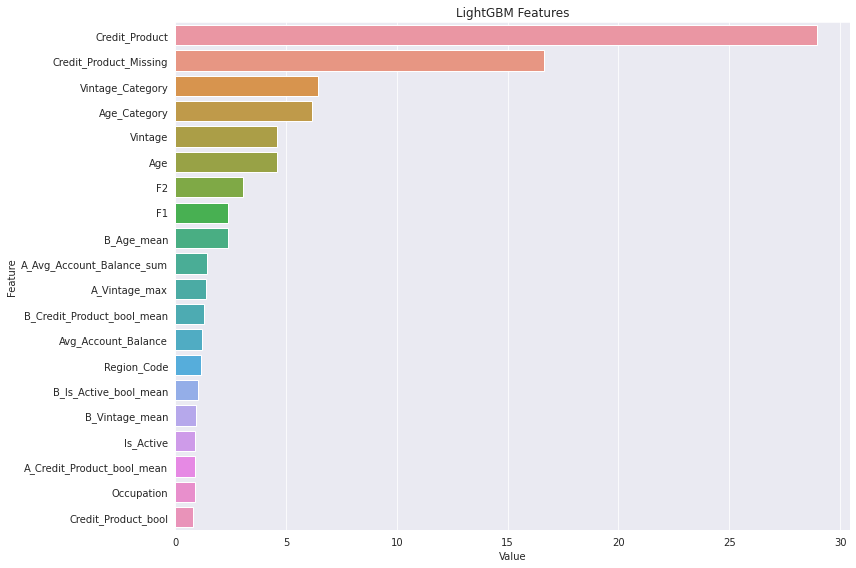

In [54]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

%matplotlib inline
feature_imp = pd.DataFrame(sorted(zip(cat_model.feature_importances_, X.columns), reverse=True)[:200], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[:20])
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [57]:
# pip install shap

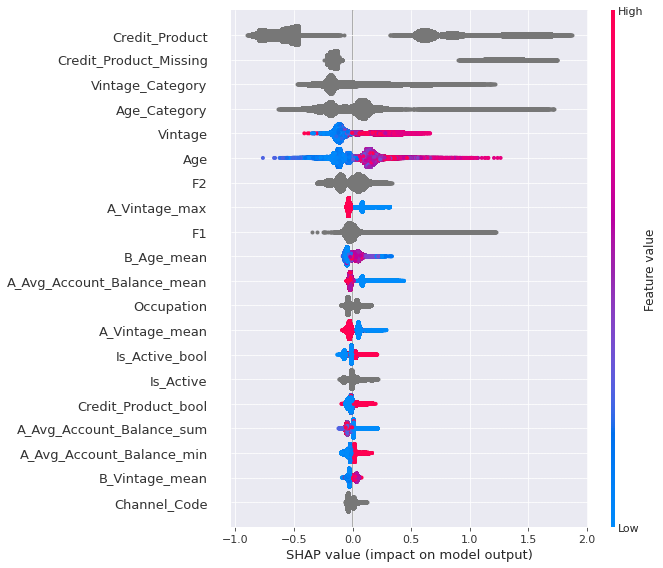

,column_name,shap_importance
6,Credit_Product,0.739251
9,Credit_Product_Missing,0.301587
11,Vintage_Category,0.208494
10,Age_Category,0.162399
5,Vintage,0.155098
...,...,...
47,C_Vintage_min,0
63,E_Vintage_min,0
64,E_Age_max,0
66,E_Occupation_nunique,0


In [58]:
import shap
shap.initjs()

shap_values = shap.TreeExplainer(cat_model).shap_values(X)

shap.summary_plot(shap_values, X)


shap_sum = np.abs(shap_values).mean(axis=0)
catboost_importance_df = pd.DataFrame([X.columns.tolist(), shap_sum.tolist()]).T
catboost_importance_df.columns = ['column_name', 'shap_importance']
catboost_importance_df = catboost_importance_df.sort_values('shap_importance', ascending=False)
catboost_importance_df

In [62]:
cat_feat_cols= catboost_importance_df[catboost_importance_df.shap_importance>0.01]['column_name'].values
len(cat_feat_cols)

37

In [63]:
from catboost import CatBoostClassifier,Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,mean_squared_error

X,y=df_train.drop(['ID','Is_Lead'],axis=1),df_train['Is_Lead']
X.loc[X.Credit_Product.isna(),'Credit_Product']='nan'

for col in X.select_dtypes('object').columns:
  X[col]=X[col].astype('category')
# print(X.dtypes)
X_train,X_val,y_train,y_val = train_test_split(X[cat_feat_cols],y,test_size=0.25,random_state = 123,stratify=y)

categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices

cat_model=CatBoostClassifier(n_estimators=3000,random_state=123,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=20)
cat_model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
pred=cat_model.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,pred))

#Base
# Shrink model to first 741 iterations.
# 0.8739884049930473

# 0.8738237546290226-> feat_imp > 0
#0.8740832092346958 -> feat_imp > 0.01
#0.8739475142430791-> feat_imp > 0.01 and ignore col

0:	test: 0.6778781	test1: 0.6785593	best: 0.6785593 (0)	total: 362ms	remaining: 18m 5s
200:	test: 0.8680845	test1: 0.8658265	best: 0.8658283 (199)	total: 58s	remaining: 13m 27s
400:	test: 0.8761864	test1: 0.8731863	best: 0.8731863 (400)	total: 2m	remaining: 13m 2s
600:	test: 0.8777275	test1: 0.8737836	best: 0.8737871 (598)	total: 3m 4s	remaining: 12m 15s
800:	test: 0.8787642	test1: 0.8740094	best: 0.8740097 (799)	total: 4m 7s	remaining: 11m 19s
1000:	test: 0.8795452	test1: 0.8740709	best: 0.8740832 (994)	total: 5m 12s	remaining: 10m 24s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8740832092
bestIteration = 994

Shrink model to first 995 iterations.
0.8740832092346958


0.8739884049930473

In [64]:
ignore_col=['Credit_Product_Imputed','Credit_Product_bool','Is_Active_bool']
cat_feat_cols_2=[x for x in cat_feat_cols if x not in ignore_col]
from catboost import CatBoostClassifier,Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,mean_squared_error

X,y=df_train.drop(['ID','Is_Lead'],axis=1),df_train['Is_Lead']
X.loc[X.Credit_Product.isna(),'Credit_Product']='nan'

for col in X.select_dtypes('object').columns:
  X[col]=X[col].astype('category')
# print(X.dtypes)
X_train,X_val,y_train,y_val = train_test_split(X[cat_feat_cols_2],y,test_size=0.25,random_state = 123,stratify=y)

categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices

cat_model=CatBoostClassifier(n_estimators=3000,random_state=123,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=20)
cat_model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
pred=cat_model.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,pred))


0:	test: 0.7248053	test1: 0.7234276	best: 0.7234276 (0)	total: 210ms	remaining: 10m 28s
200:	test: 0.8694460	test1: 0.8659256	best: 0.8659256 (200)	total: 57.5s	remaining: 13m 20s
400:	test: 0.8770798	test1: 0.8730493	best: 0.8730493 (400)	total: 1m 59s	remaining: 12m 52s
600:	test: 0.8780281	test1: 0.8737150	best: 0.8737193 (598)	total: 3m 2s	remaining: 12m 9s
800:	test: 0.8787252	test1: 0.8739062	best: 0.8739108 (799)	total: 4m 5s	remaining: 11m 13s
1000:	test: 0.8793740	test1: 0.8738913	best: 0.8739475 (919)	total: 5m 9s	remaining: 10m 18s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8739475142
bestIteration = 919

Shrink model to first 920 iterations.
0.8739475142430791


In [65]:
X_train.columns

Index(['Credit_Product', 'Credit_Product_Missing', 'Vintage_Category',
       'Age_Category', 'Vintage', 'Age', 'F2', 'A_Vintage_max', 'F1',
       'B_Age_mean', 'A_Avg_Account_Balance_mean', 'Occupation',
       'A_Vintage_mean', 'Is_Active', 'A_Avg_Account_Balance_sum',
       'A_Avg_Account_Balance_min', 'B_Vintage_mean', 'Channel_Code',
       'Region_Code', 'Avg_Account_Balance', 'B_Is_Active_bool_mean',
       'A_Credit_Product_bool_mean', 'D_Vintage_max',
       'A_Avg_Account_Balance_max', 'B_Avg_Account_Balance_max',
       'B_Credit_Product_bool_mean', 'C_Avg_Account_Balance_min',
       'B_Avg_Account_Balance_mean', 'E_Vintage_sum', 'B_Vintage_sum',
       'D_Avg_Account_Balance_max', 'E_Avg_Account_Balance_max', 'F4',
       'C_Avg_Account_Balance_sum', 'F3'],
      dtype='object')

## LGBM Feature Importance

In [73]:
from lightgbm import LGBMClassifier

X,y=df_train.drop(['ID','Is_Lead'],axis=1),df_train['Is_Lead']
X.loc[X.Credit_Product.isna(),'Credit_Product']='nan'

for col in X.select_dtypes('object').columns:
  X[col]=X[col].astype('category')
print(X.dtypes)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 123,stratify=y)
lgbm_model=LGBMClassifier(n_estimators=5000,random_state=123,learning_rate=0.05,colsample_bytree=0.5,reg_alpha=4,min_split_gain=0.2,min_child_samples=2,bagging_fraction=0.9,max_depth=-1, )
lgbm_model.fit(X_train,y_train,eval_set=[(X_val, y_val)],eval_metric='AUC', early_stopping_rounds=200,verbose=200)
pred=lgbm_model.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,pred))

#Base
# 0.8724607564785816

Gender                       category
Age                             int64
Region_Code                  category
Occupation                   category
Channel_Code                 category
                               ...   
E_Age_max                       int64
E_Age_min                       int64
E_Occupation_nunique            int64
E_Region_Code_nunique           int64
E_Credit_Product_bool_sum       int64
Length: 69, dtype: object
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.871932	valid_0's binary_logloss: 0.346088
Early stopping, best iteration is:
[84]	valid_0's auc: 0.872461	valid_0's binary_logloss: 0.346297
0.8724607564785816


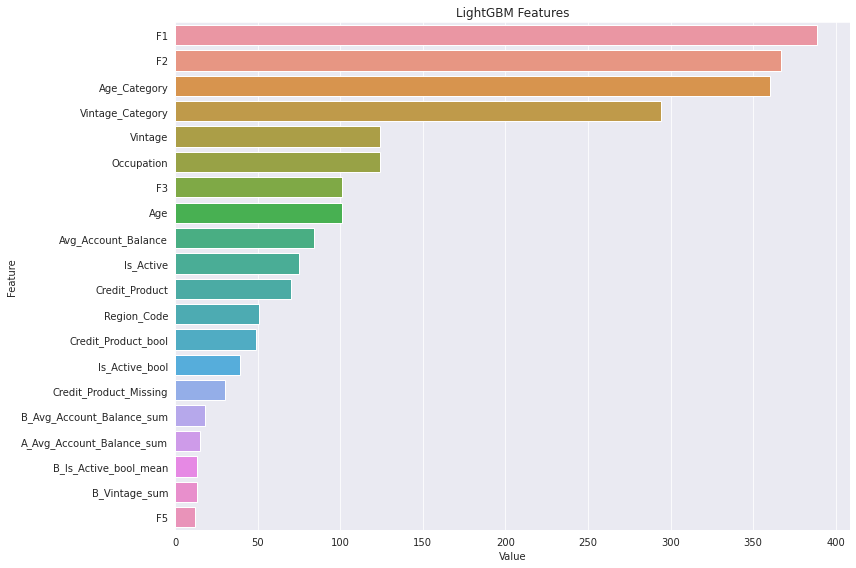

In [74]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

%matplotlib inline
feature_imp = pd.DataFrame(sorted(zip(lgbm_model.feature_importances_, X.columns), reverse=True)[:200], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[:20])
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

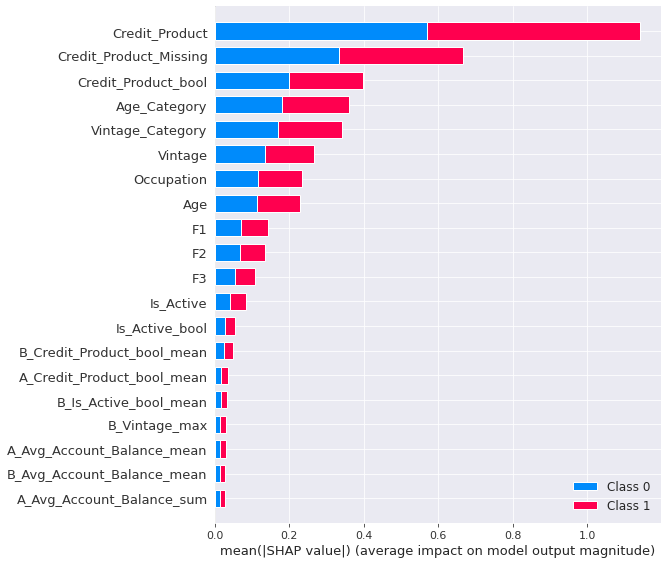

In [75]:
import shap
shap.initjs()

shap_values = shap.TreeExplainer(lgbm_model).shap_values(X)

shap.summary_plot(shap_values, X)

In [76]:
shap_sum = np.abs(shap_values).mean(axis=0).mean(axis=0)
lgbm_importance_df = pd.DataFrame([X.columns.tolist(), shap_sum.tolist()]).T
lgbm_importance_df.columns = ['column_name', 'shap_importance']
lgbm_importance_df = lgbm_importance_df.sort_values('shap_importance', ascending=False)
lgbm_importance_df

,column_name,shap_importance
6,Credit_Product,0.570702
9,Credit_Product_Missing,0.333603
18,Credit_Product_bool,0.199562
10,Age_Category,0.180756
11,Vintage_Category,0.170478
...,...,...
27,A_Age_min,0
28,A_Channel_Code_nunique,0
29,A_Region_Code_nunique,0
37,B_Vintage_min,0


In [79]:
lgbm_feat_cols= lgbm_importance_df[lgbm_importance_df.shap_importance>0.0]['column_name'].values
len(lgbm_feat_cols)

51

In [80]:
ignore_col=['Credit_Product_Imputed','Credit_Product_bool','Is_Active_bool']
lgbm_feat_cols_2=[x for x in lgbm_feat_cols if x not in ignore_col]

from catboost import CatBoostClassifier,Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,mean_squared_error

X,y=df_train.drop(['ID','Is_Lead'],axis=1),df_train['Is_Lead']
X.loc[X.Credit_Product.isna(),'Credit_Product']='nan'

for col in X.select_dtypes('object').columns:
  X[col]=X[col].astype('category')
# print(X.dtypes)
X_train,X_val,y_train,y_val = train_test_split(X[lgbm_feat_cols_2],y,test_size=0.25,random_state = 123,stratify=y)

lgbm_model=LGBMClassifier(n_estimators=5000,random_state=123,learning_rate=0.05,colsample_bytree=0.5,reg_alpha=4,min_split_gain=0.2,min_child_samples=2,bagging_fraction=0.9,max_depth=-1, )
lgbm_model.fit(X_train,y_train,eval_set=[(X_val, y_val)],eval_metric='AUC', early_stopping_rounds=200,verbose=200)
pred=lgbm_model.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,pred))


# 0.8724607564785816 -> Base
# 0.8722905675135835 -> feat_imp >0
# 0.8722288147487642 -> feat_imp>0.01

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.871862	valid_0's binary_logloss: 0.346068
Early stopping, best iteration is:
[96]	valid_0's auc: 0.872291	valid_0's binary_logloss: 0.34598
0.8722905675135835


# K fold Training 

In [82]:
df.loc[df.Credit_Product.isna(),'Credit_Product']='nan'
for col in df.select_dtypes('object').columns:
  df[col]=df[col].astype('category')
df_train=df[~df.Is_Lead.isna()]
df_test=df[df.Is_Lead.isna()]

## Catboost

In [67]:
%%time
catboost_auc=[]
catboost_y_pred_tot=[]
model=[]

X,y=df_train.drop(['ID','Is_Lead'],axis=1),df_train['Is_Lead']
Xtest=df_test.drop(['ID','Is_Lead'],axis=1)

cat_feat_cols= catboost_importance_df[catboost_importance_df.shap_importance>0.01]['column_name'].values
ignore_col=['Credit_Product_Imputed','Credit_Product_bool','Is_Active_bool']
cat_feat_cols_2=[x for x in cat_feat_cols if x not in ignore_col]
# print(X[cat_feat_cols_2].dtypes)
categorical_features_indices = np.where(X_train[cat_feat_cols_2].dtypes =='category')[0]
categorical_features_indices

from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=123)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X[cat_feat_cols_2].iloc[train_index], X[cat_feat_cols_2].iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    m=CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=20)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
    # model.append(m)
    
    preds=m.predict_proba(X_test,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    catboost_auc.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest[cat_feat_cols_2],ntree_end=m.best_iteration_)[:,-1]
    catboost_y_pred_tot.append(p)

0:	test: 0.6947530	test1: 0.6904250	best: 0.6904250 (0)	total: 487ms	remaining: 24m 19s
200:	test: 0.8692869	test1: 0.8627872	best: 0.8627872 (200)	total: 1m 9s	remaining: 16m 5s
400:	test: 0.8770725	test1: 0.8695379	best: 0.8695379 (400)	total: 2m 19s	remaining: 15m 4s
600:	test: 0.8783792	test1: 0.8700453	best: 0.8700778 (580)	total: 3m 30s	remaining: 13m 59s
800:	test: 0.8789495	test1: 0.8700721	best: 0.8701290 (726)	total: 4m 43s	remaining: 12m 58s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.870129032
bestIteration = 726

Shrink model to first 727 iterations.
err:  0.8701195865492763
0:	test: 0.6944025	test1: 0.6904750	best: 0.6904750 (0)	total: 405ms	remaining: 20m 13s
200:	test: 0.8691346	test1: 0.8665310	best: 0.8665310 (199)	total: 1m 7s	remaining: 15m 37s
400:	test: 0.8763545	test1: 0.8737910	best: 0.8737910 (400)	total: 2m 16s	remaining: 14m 41s
600:	test: 0.8777597	test1: 0.8744240	best: 0.8744404 (598)	total: 3m 27s	remaining: 13m 47s
Stopped by ove

In [68]:
X_train.columns

Index(['Credit_Product', 'Credit_Product_Missing', 'Vintage_Category',
       'Age_Category', 'Vintage', 'Age', 'F2', 'A_Vintage_max', 'F1',
       'B_Age_mean', 'A_Avg_Account_Balance_mean', 'Occupation',
       'A_Vintage_mean', 'Is_Active', 'A_Avg_Account_Balance_sum',
       'A_Avg_Account_Balance_min', 'B_Vintage_mean', 'Channel_Code',
       'Region_Code', 'Avg_Account_Balance', 'B_Is_Active_bool_mean',
       'A_Credit_Product_bool_mean', 'D_Vintage_max',
       'A_Avg_Account_Balance_max', 'B_Avg_Account_Balance_max',
       'B_Credit_Product_bool_mean', 'C_Avg_Account_Balance_min',
       'B_Avg_Account_Balance_mean', 'E_Vintage_sum', 'B_Vintage_sum',
       'D_Avg_Account_Balance_max', 'E_Avg_Account_Balance_max', 'F4',
       'C_Avg_Account_Balance_sum', 'F3'],
      dtype='object')

In [69]:
print(f"Mean AUC : {np.mean(catboost_auc)}")

Mean AUC : 0.8743429899281463


In [70]:
np.mean(catboost_y_pred_tot,0)

array([0.04795379, 0.85711454, 0.05716801, ..., 0.08893579, 0.22412649,
       0.05203612])

In [71]:
test['Is_Lead']=np.mean(catboost_y_pred_tot,0)
submission=test[['ID','Is_Lead']]
submission.to_csv('Kfold-catboost-featEngWtImp-v2.csv',index=False)

## LGBM

In [85]:
lgbm_auc=[]
lgbm_y_pred_tot=[]
model=[]

X,y=df_train.drop(['ID','Is_Lead'],axis=1),df_train['Is_Lead']
Xtest=df_test.drop(['ID','Is_Lead'],axis=1)

lgbm_feat_cols= lgbm_importance_df[lgbm_importance_df.shap_importance>0.01]['column_name'].values
ignore_col=['Credit_Product_Imputed','Credit_Product_bool','Is_Active_bool']
lgbm_feat_cols_2=[x for x in lgbm_feat_cols if x not in ignore_col]

from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=123)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X[lgbm_feat_cols_2].iloc[train_index], X[lgbm_feat_cols_2].iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    m=LGBMClassifier(n_estimators=5000,random_state=123,learning_rate=0.05,colsample_bytree=0.5,reg_alpha=4,min_split_gain=0.2,min_child_samples=2,bagging_fraction=0.9,max_depth=-1, )
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)],eval_metric='AUC', early_stopping_rounds=200,verbose=200)
    # model.append(m)
    
    preds=m.predict_proba(X_test,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    lgbm_auc.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest[lgbm_feat_cols_2],ntree_end=m.best_iteration_)[:,-1]
    lgbm_y_pred_tot.append(p)

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.86892	valid_0's binary_logloss: 0.348789
Early stopping, best iteration is:
[124]	valid_0's auc: 0.869563	valid_0's binary_logloss: 0.348723
err:  0.8695634939201589
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.87252	valid_0's binary_logloss: 0.343427
Early stopping, best iteration is:
[138]	valid_0's auc: 0.873045	valid_0's binary_logloss: 0.343049
err:  0.8730448252504678
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.873067	valid_0's binary_logloss: 0.345947
Early stopping, best iteration is:
[162]	valid_0's auc: 0.872954	valid_0's binary_logloss: 0.345868
err:  0.8729542604431153
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.875079	valid_0's binary_logloss: 0.344323
Early stopping, best iteration is:
[101]	valid_0's auc: 0.875974	valid_0's binary_logloss: 0.344202
err:  0.8759739

In [86]:
X_train.columns

Index(['Credit_Product', 'Credit_Product_Missing', 'Age_Category',
       'Vintage_Category', 'Vintage', 'Occupation', 'Age', 'F1', 'F2', 'F3',
       'Is_Active', 'B_Credit_Product_bool_mean', 'A_Credit_Product_bool_mean',
       'B_Is_Active_bool_mean', 'B_Vintage_max', 'A_Avg_Account_Balance_mean',
       'B_Avg_Account_Balance_mean', 'A_Avg_Account_Balance_sum',
       'A_Avg_Account_Balance_min'],
      dtype='object')

In [87]:
print(f"Mean AUC : {np.mean(lgbm_auc)}")

Mean AUC : 0.8731544689865924


In [88]:
np.mean(lgbm_y_pred_tot,0)

array([0.04065366, 0.82430373, 0.06014791, ..., 0.10882942, 0.23399003,
       0.04694514])

In [89]:
test['Is_Lead']=np.mean(lgbm_y_pred_tot,0)
submission=test[['ID','Is_Lead']]
submission.to_csv('Kfold-lgbm-featEngWtImp-v2.csv',index=False)

# Ensemble

In [90]:
m1=pd.read_csv('Kfold-catboost-featEngWtImp-v2.csv') #0.8743061682061942
m2=pd.read_csv('Kfold-lgbm-featEngWtImp-v2.csv') #0.8732367131547722

In [91]:
sub=m1.copy()
sub['Is_Lead']=m1.Is_Lead*0.85+m2.Is_Lead*0.15
sub.head()

,ID,Is_Lead
0,VBENBARO,0.046859
1,CCMEWNKY,0.852193
2,VK3KGA9M,0.057615
3,TT8RPZVC,0.023959
4,SHQZEYTZ,0.021310


In [94]:
sub.to_csv('ensemble-Kfold-Cat(85)Lgbm(15)-featEngWtImp-V2.csv',index=False)

In [93]:
np.mean(catboost_auc)*0.85+np.mean(lgbm_auc)*0.15

0.8741647117869131